# Machine Learning in Python - Project 1
This is the original 'project 1' file before it was splintered on 03/03/21 - replaced and renamed for marking purposes! All of the code here is as it was when we all met on PM of 02/03/21 for reference. Use the project1.ipynb in the main folder as the main branch, copying and pasting from here when needed :) 

Due Friday, March 6th by 5 pm.

Finlay Young, Cecilia Hernandez-Vargas, Rachel Dance

## 0. Setup

In [ ]:
# Install required packages
!pip install -q -r requirements.txt
#test code change

In [1]:
#Added a test cell

In [ ]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install metaphone
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
from metaphone import doublemetaphone


# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

In [ ]:
# Load data
df = pd.read_csv("the_office.csv")
df

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,Matt Sohn,Dan Sterling,8.0,1484,2013-04-11,273,59,2965,24,Andy;Angela;Creed;Dwight;Erin;Jim;Kevin;Meredi...
182,9,20,Paper Airplane,Jesse Peretz,Halsted Sullivan;Warren Lieberstein,8.0,1482,2013-04-25,234,48,2564,27,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
183,9,21,Livin' the Dream,Jeffrey Blitz,Nicki Schwartz-Wright,8.9,2041,2013-05-02,382,33,4333,20,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...
184,9,22,A.A.R.M,David Rogers,Brent Forrester,9.3,2860,2013-05-09,501,54,4965,30,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...


## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client). If you use any additional data sources, you should introduce them here and discuss why they were included.*

Briefly outline the approaches being used: 

Conclusions that you are able to draw.

## 2. Exploratory Data Analysis and Feature Engineering

### Notes on what to look at:
* As Seasons increase, we see an increased variance in the ratings given, whilst also a increasing then decreasing mean rating for the season (this could be tabulated and expressed in results), but we also see that total votes decreaeses as seasons go on. So it would appear that maybe the ratings are skewed as the show becomes more established/populare. 
* make number of lines & number of words & number of speaking characters into intervals, rather than just having integer values. We should provide ranges of these to help with forming the data from the grouped ()


In [ ]:
# Can i suggest putting names on cells in comments or something? So we know whos working on what cells? :D
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['n_lines'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)


In [ ]:
df


,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars,quantile_ex_3
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,Bronze
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...,Bronze
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,Bronze
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,Bronze
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,Matt Sohn,Dan Sterling,8.0,1484,2013-04-11,273,59,2965,24,Andy;Angela;Creed;Dwight;Erin;Jim;Kevin;Meredi...,Gold
182,9,20,Paper Airplane,Jesse Peretz,Halsted Sullivan;Warren Lieberstein,8.0,1482,2013-04-25,234,48,2564,27,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...,Bronze
183,9,21,Livin' the Dream,Jeffrey Blitz,Nicki Schwartz-Wright,8.9,2041,2013-05-02,382,33,4333,20,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...,Diamond
184,9,22,A.A.R.M,David Rogers,Brent Forrester,9.3,2860,2013-05-09,501,54,4965,30,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...,Diamond


In [ ]:
bins = [0, 1, 5, 10, 25, 50, 100]
df['binned'] = pd.cut(df['percentage'], bins)

KeyError: 'percentage'

In [ ]:
d2["x_bin"] = pd.cut(d2.n_speak_char, np.linspace(12,54,10))
d2

NameError: name 'd2' is not defined

In [ ]:
# RJD - please leave this as a clean copy as im using it below! 
df = pd.read_csv("the_office.csv") # Get a clean copy of the data


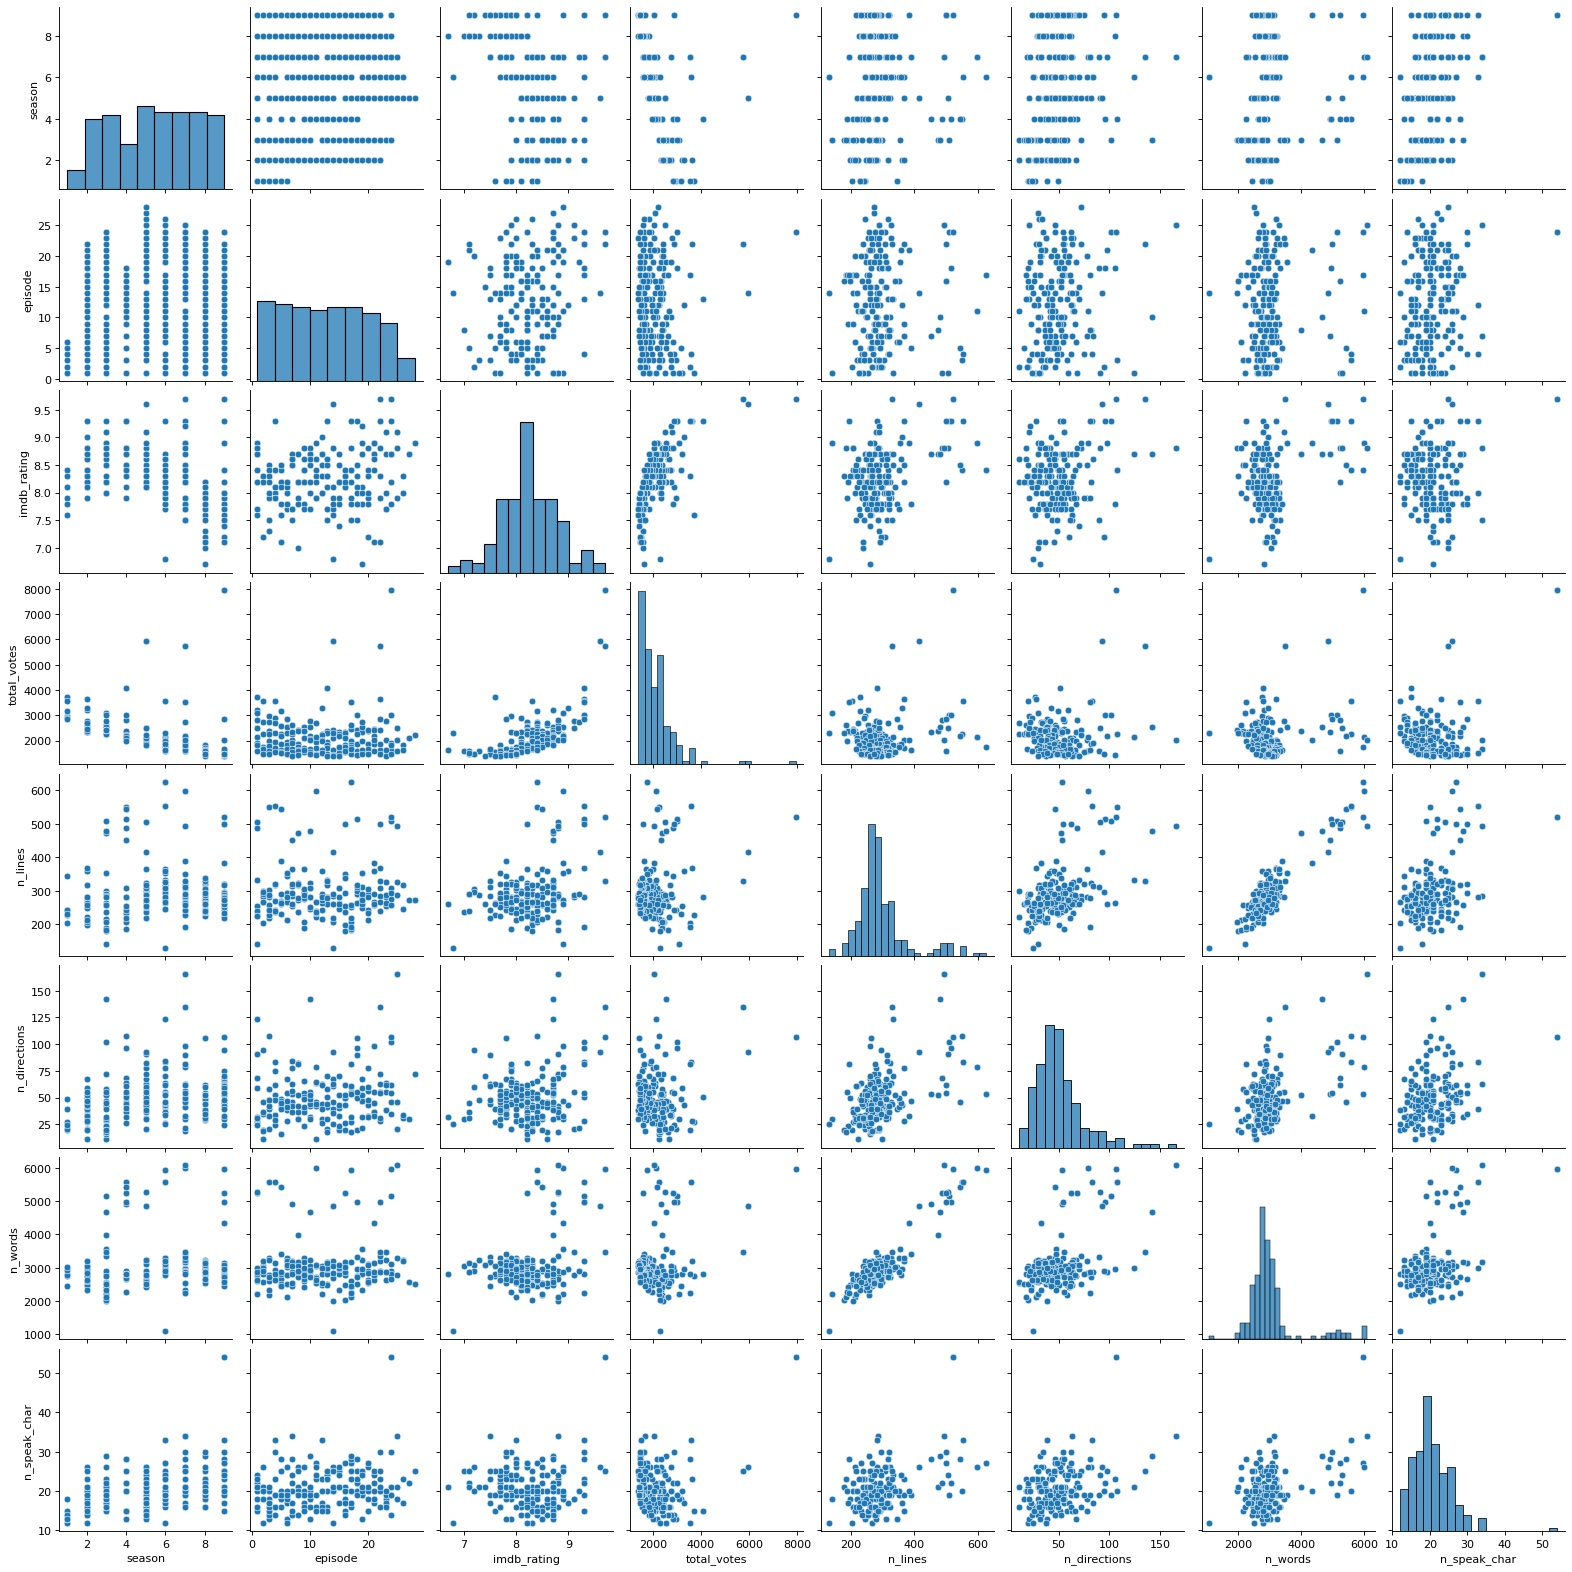

In [ ]:
sns.pairplot(data=df)

### Pairplot - Summary of initial observations:
So the pairplot reveals that there may be some correlation between n_line and n_words which is completely expected and not interesting for this problem of episode popularity. 

If we scan the pairplot to see total_votes on the y axis, then we see that very roughly, the number of votes goes (y) up as the imdb rating increases (x), and that this does not show a linear pattern. It almost looks like it might fit a of function of quadratic form, purely by eye but it is also clear that there is a significant spread of data at each ratings value. Is there also a hint that there is a local minima when the ratings are of the order of 1-2? 

It is also worth noting that the pairplot does not work with non-numeric fields and does not show a complete representation of the data. 

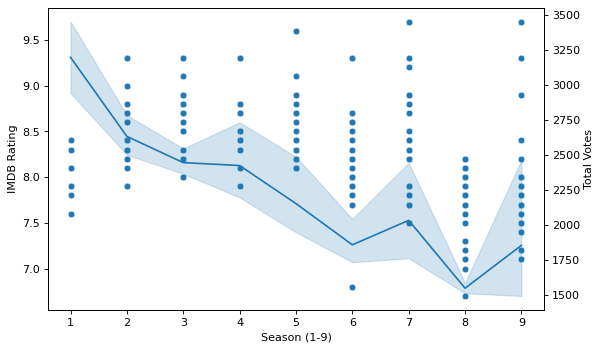

In [ ]:

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.scatterplot(x='season', y='imdb_rating',data=df,ax = ax1)
sns.lineplot(x = 'season', y='total_votes',  data = df, ax = ax2 )
ax1.set_xlabel('Season (1-9)')
ax1.set_ylabel('IMDB Rating')
ax2.set_ylabel('Total Votes')
plt.show()



### Initial look at the data for names of directors/writers

In [ ]:
# We can get each director into a column with a 1 or 0 - get dummies

df_dummies = pd.get_dummies(df['director'])
print('df_dummies.shape =', df_dummies.shape)
df_dummies.columns

df_dummies.shape = (186, 61)


Index(['Alex Hardcastle', 'Amy Heckerling', 'Asaad Kelada', 'B.J. Novak',
       'Brent Forrester', 'Brian Baumgartner', 'Bryan Cranston',
       'Bryan Gordon', 'Charles McDougal', 'Charles McDougall',
       'Charlie Grandy', 'Claire Scanlon', 'Claire Scanlong', 'Craig Zisk',
       'Daniel Chun', 'Danny Leiner', 'David Rogers', 'Dean Holland',
       'Dennie Gordon', 'Ed Helms', 'Eric Appel',
       'Gene Stupnitsky;Lee Eisenberg', 'Greg Daneils', 'Greg Daniels',
       'Harold Ramis', 'J.J. Abrams', 'Jason Reitman', 'Jeffrey Blitz',
       'Jennifer Celotta', 'Jesse Peretz', 'John Krasinski', 'John Scott',
       'Jon Favreau', 'Joss Whedon', 'Julian Farino', 'Kelly Cantley-Kashima',
       'Ken Kwapis', 'Ken Whittingham', 'Ken Wittingham',
       'Lee Eisenberg;Gene Stupnitsky', 'Lee Kirk', 'Marc Webb', 'Matt Sohn',
       'Michael Spiller', 'Miguel Arteta', 'Mindy Kaling', 'Paul Feig',
       'Paul Lieberstein', 'Paul Lieerstein', 'Rainn Wilson',
       'Randall Einhorn', 'Regina

We have  61  unique director cells
A list of the unique director cells below: 


<AxesSubplot:>

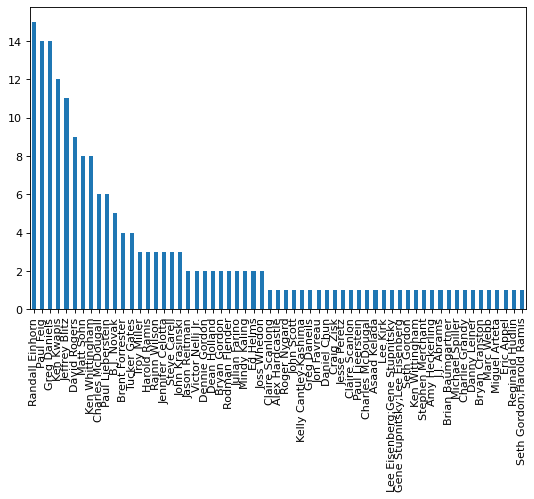

In [ ]:
# RJD - Aiming to produce a plot of number of times each name appears in the directors/writers list
# How many unique directors do we have?

print('We have ', df['director'].nunique(),' unique director cells')

print('A list of the unique director cells below: ')
director_list = df['director'].value_counts(normalize=False)#.tolist
director_list
df['director'].value_counts(normalize=False).plot(kind='bar')


We can see from the plot above that there are two issues. 
<ol>
<li> When numerous directors appear in one entry - this is treated as a separate person, i.e. when an entry in director contains two names, this is being counted separately and it is not added to the count of the directors individually.
<li>There are some typos in the data - we can see Ken Whittingham has 8 entries, but Ken Wittingham only has 1 - its reasonable to assume this is a typo in the database, indicating that this requires some data cleaning
</ol>

In [ ]:
## DATA CLEANING - not relevant.

# Find a typo:  creating and passsing series to new column 
typo = 'Kwapis'
df['typos_present'] = df["director"].str.find(typo, 1) 
df.head(5)

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars,typos_present
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,4
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...,4
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,-1
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,-1
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...,-1


### Who is the highest voted director?

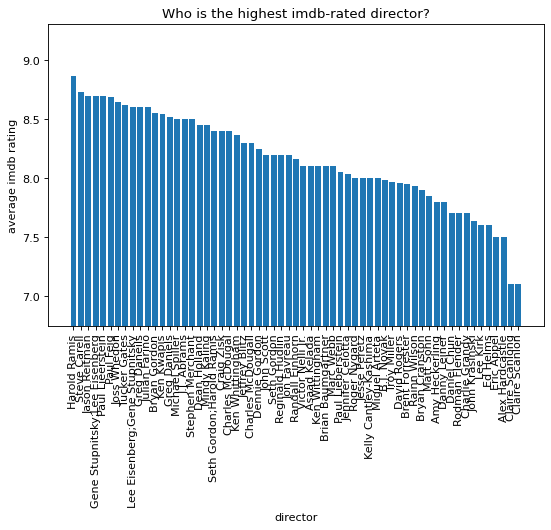

In [ ]:
# Who is the highest voted director?
df_sub = df[['director','imdb_rating']]
df_sub = df_sub.groupby('director').mean()
df_sub = df_sub.sort_values('imdb_rating', ascending=False)#.plot(kind='bar')
min_imdb_rating = np.min(df_sub['imdb_rating'])
max_imdb_rating = np.max(df_sub['imdb_rating'])

plt.bar(df_sub.index, df_sub['imdb_rating'])
plt.xticks(rotation=90)
plt.xlabel('director')
plt.ylabel('average imdb rating')
plt.ylim([min_imdb_rating*0.95,max_imdb_rating*1.05])
plt.title('Who is the highest imdb-rated director?')
plt.show()


In [ ]:
# Rach working in here to try and deal with some of the text data 
# --- So far searching directors... then plan to extend to main cast characters

## Found a function online that claims to match words - eliminating typos 
# from fuzzywuzzy import process
# def find_best_match(misspelled, correct_names):
#     closest, ratio = process.extractOne(misspelled, correct_names)
#     return closest, ratio
# closest, ratio = find_best_match('randall', director_list)
# print(closest, ratio)

# Testing:
# if ";" not in df['director'][0]: 
#     print(df['director'][0])
# else:
#     print('not in')

#
director_list = df['director'].value_counts(normalize=False)#.tolist
director_list


Randall Einhorn     15
Paul Feig           14
Greg Daniels        14
Ken Kwapis          12
Jeffrey Blitz       11
                    ..
Craig Zisk           1
Jesse Peretz         1
Charles McDougal     1
Seth Gordon          1
Jon Favreau          1
Name: director, Length: 61, dtype: int64

### Typo Cleaner

In [ ]:
def typo_cleaner(col_name, df):
    '''
    Function looks at column of data in pd dataframe, and makes checks 
    for typos. Conditions - all entries that only appear once, that have
    no semicolon in (i.e. only one name) and that are a >90% match to their
    closest match in the list. This doesnt catch all typos but, a good start!

    Dependencies: Requires fuzzywuzzy (from fuzzywuzzy import process)
    Inputs:
        col_name: string of column name you want to check
        df: pd dataframe on which you can do df['col_name']
    Output: none 
    '''
    k = 0 # just a counter
    choices = df[col_name]
    # # For each director in the list print out the matches:
    # for i in range(len(choices)): 
    #     k+=1
    #     print(choices[i],' === ',process.extract(choices[i], choices, limit=3))

    matches_limit = 3 # how many matches we want for each director

    for i in range(len(choices)):
        # Calculate closest matches to the current string
        matches = process.extract(choices[i], choices, limit = matches_limit)
        # print('i == ', i, 'matches=== ',  matches)
        # If director only appears one time exactly, its a 90% match to its closest match and doesnt contain ';':
        if (choices.str.count(choices[i]).sum()) == 1 and matches[1][1] > 90 and ";" not in choices[i]: 
            #print(df[col_name][i], df[col_name].str.count(df[col_name][i]).sum())
            #print('matches === ', matches)
            #print('old entry == ', choices[i])
            #print('... swap gets made here ...')
            df[col_name][i] = matches[1][0]
            #print (choices[i], '=== ', matches[1][0])
            #print('new entry == ', choices[i])

    print(k)

typo_cleaner('director',df)

0


In [ ]:
## Split and sort the entries of main chars:
# k=0
# for i in range(len(df['main_chars'])-1):
#     # type(df['main_chars'][100].split(';'))
#     episode_chars = df['main_chars'][i]
#     print(episode_chars)
#     # df['main_chars'][i] = episode_chars.split(';')
#     k+=1
# print(k)
# for episode_chars in df['main_chars']:
#     print(df['main_chars'][episode_chars])

# create a copy of the original data import:
df_split_test = copy.deepcopy(df)

# Split the main_chars col into individuals and 
for i in range(len(df_split_test['main_chars'])):
    df_split_test['main_chars'][i] = df_split_test['main_chars'][i].split(';')
    # print(type(df_split_test))

ccc = df_split_test.main_chars.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
df_full = pd.concat([df_split_test, ccc], axis=1)
df_full


In [ ]:
df_full["month"] = df_full["air_date"].str[5:7]
df_full['day_of_week'] = pd.to_datetime(df_full['air_date']).dt.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_full['day_of_week'] = df_full['day_of_week'].apply(lambda x: days[x])

df_full.drop(['season', 'air_date','main_chars','episode_name'], axis=1, inplace=True)
df_full

,episode,director,writer,imdb_rating,total_votes,n_lines,n_directions,n_words,n_speak_char,Angela,...,Stanley,Kelly,Toby,Meredith,Darryl,Creed,Andy,Erin,month,day_of_week
0,1,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,229,27,2757,15,1,...,1,0,0,0,0,0,0,0,03,Thursday
1,2,Ken Kwapis,B.J. Novak,8.3,3566,203,20,2808,12,1,...,1,1,1,0,0,0,0,0,03,Tuesday
2,3,Ken Whittingham,Paul Lieberstein,7.9,2983,244,21,2769,13,1,...,1,0,0,1,0,0,0,0,04,Tuesday
3,4,Bryan Gordon,Michael Schur,8.1,2886,243,24,2939,14,1,...,1,0,1,1,0,0,0,0,04,Tuesday
4,5,Greg Daniels,Greg Daniels,8.4,3179,230,49,2437,18,1,...,1,0,0,0,1,0,0,0,04,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19,Matt Sohn,Dan Sterling,8.0,1484,273,59,2965,24,1,...,1,0,1,1,0,1,1,1,04,Thursday
182,20,Jesse Peretz,Halsted Sullivan;Warren Lieberstein,8.0,1482,234,48,2564,27,1,...,1,0,1,0,1,1,1,1,04,Thursday
183,21,Jeffrey Blitz,Nicki Schwartz-Wright,8.9,2041,382,33,4333,20,1,...,1,0,1,1,1,1,1,1,05,Thursday
184,22,David Rogers,Brent Forrester,9.3,2860,501,54,4965,30,1,...,1,0,0,1,1,1,1,1,05,Thursday


### Correlation matrix
Correlation matrix for all characters, imdb rating and total votes as we are using these as a proxy for popularity

<AxesSubplot:>

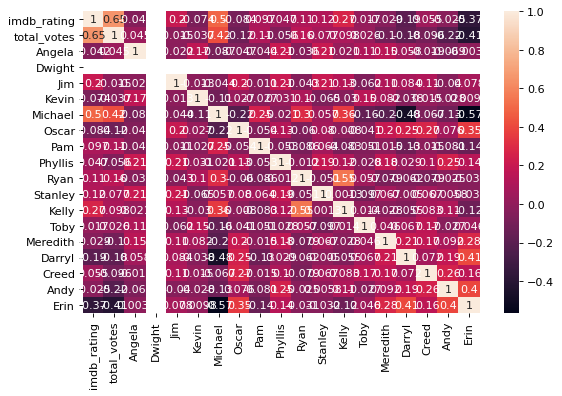

In [ ]:
# plt.matshow(df_full.corr()) 
# plt.show() 

corrMatrix = df_full.drop(['episode','n_lines','n_directions','n_lines', 'n_words','n_speak_char'], axis=1)
sns.heatmap(corrMatrix.corr(), annot=True) 

To address the white lines for the 'Dwight' data - this is the only character appears in every single episode of the database so he recieves a correlation of 1. Shortly verified by the cell below, where the sum of all of the character columns shows the number of occurrences, and verifies this. The Dwight data then cannot tell us anything predictive about the popularity of an episode.

In [ ]:
# Sum over all main character columns:
df_full[['Andy', 'Angela', 'Creed', 'Darryl', 'Dwight', 'Erin', 'Jim', 'Kelly', 
'Kevin', 'Meredith', 'Michael', 'Oscar', 'Pam', 'Phyllis', 'Ryan', 'Stanley',
 'Toby']].sum()

# OR Count how many cells contain 'Dwight': 
df['main_chars'].str.count('Dwight').sum() 

186

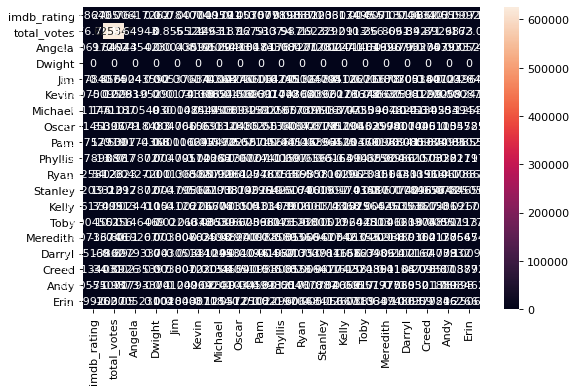

In [ ]:
# Covariance Matrix - just tried to see! Using the same data as the above Corr Matrix...
covMatrix = pd.DataFrame.cov(corrMatrix) 
sns.heatmap(covMatrix, annot=True, fmt='g') 
plt.show() 

# covMatrix = np.cov(data, bias = False) 
# print(covMatrix) 


In [ ]:
ceci_ = pd.get_dummies(df_full)
ceci_

,episode,imdb_rating,total_votes,n_lines,n_directions,n_words,n_speak_char,Angela,Dwight,Jim,...,month_03,month_04,month_05,month_09,month_10,month_11,month_12,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday
0,1,7.6,3706,229,27,2757,15,1,1,1,...,1,0,0,0,0,0,0,0,1,0
1,2,8.3,3566,203,20,2808,12,1,1,1,...,1,0,0,0,0,0,0,0,0,1
2,3,7.9,2983,244,21,2769,13,1,1,1,...,0,1,0,0,0,0,0,0,0,1
3,4,8.1,2886,243,24,2939,14,1,1,1,...,0,1,0,0,0,0,0,0,0,1
4,5,8.4,3179,230,49,2437,18,1,1,1,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,19,8.0,1484,273,59,2965,24,1,1,1,...,0,1,0,0,0,0,0,0,1,0
182,20,8.0,1482,234,48,2564,27,1,1,1,...,0,1,0,0,0,0,0,0,1,0
183,21,8.9,2041,382,33,4333,20,1,1,1,...,0,0,1,0,0,0,0,0,1,0
184,22,9.3,2860,501,54,4965,30,1,1,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
cc = df_split_test#['main_chars']
#df_split_test.head()
#ceci.drop(ceci.columns[[2, 3, 4,7,12,13]], axis=1)

ccc = df_split_test.main_chars.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
# type(ccc)

df_full.drop(['main_chars'], axis=1, inplace=True)


pandas.core.frame.DataFrame

In [ ]:
'''
Create the full dataframe - append the exploded main characters columns to the 
original dataframe
'''
df_full = pd.concat([df_split_test, ccc], axis=1)

un


,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,...,Phyllis,Ryan,Stanley,Kelly,Toby,Meredith,Darryl,Creed,Andy,Erin
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,...,1,1,1,0,0,0,0,0,0,0
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,...,0,1,1,1,1,0,0,0,0,0
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,...,0,1,1,0,0,1,0,0,0,0
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,...,1,1,1,0,1,1,0,0,0,0
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,...,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,Matt Sohn,Dan Sterling,8.0,1484,2013-04-11,273,59,...,1,0,1,0,1,1,0,1,1,1
182,9,20,Paper Airplane,Jesse Peretz,Halsted Sullivan;Warren Lieberstein,8.0,1482,2013-04-25,234,48,...,0,0,1,0,1,0,1,1,1,1
183,9,21,Livin' the Dream,Jeffrey Blitz,Nicki Schwartz-Wright,8.9,2041,2013-05-02,382,33,...,1,0,1,0,1,1,1,1,1,1
184,9,22,A.A.R.M,David Rogers,Brent Forrester,9.3,2860,2013-05-09,501,54,...,1,0,1,0,0,1,1,1,1,1


In [ ]:
#f2.groups.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
#cc = df_split_test['main_chars']
#cc
#c2 = pd.DataFrame(cc)

#f2.groups.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
print("hi_hi_hi")
df_split_test.main_chars.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')



hi_hi_hi


,Angela,Dwight,Jim,Kevin,Michael,Oscar,Pam,Phyllis,Ryan,Stanley,Kelly,Toby,Meredith,Darryl,Creed,Andy,Erin
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0
2,1,1,1,1,1,1,1,0,1,1,0,0,1,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1
182,1,1,1,1,0,1,1,0,0,1,0,1,0,1,1,1,1
183,1,1,1,1,0,1,1,1,0,1,0,1,1,1,1,1,1
184,1,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,1


In [ ]:
#Count how many times each name df['director'][3] comes up:
df['director'].str.count(df['director'][3]).sum()

# Count how many cells contain ';'
df['main_chars'].str.count('Dwight').sum() 


186

In [ ]:
# https://stackoverflow.com/questions/41970992/appending-values-to-dictionary-in-for-loop
# dict = {}
# for n in n1:
#     if # condition #
#         dict[key] = []
#         dict[key].append(value)
#         print dict

### Google Scraping

In [ ]:
# Google Scraping for URL results on a director...
# -- we can see whether a name as a number of hits and determine whether its genuine

!pip install bs4
import requests
from bs4 import BeautifulSoup
import re
import urllib.parse

from urllib.parse import urlparse
def googleSearch(query):
    g_clean = [ ] #//this is the list we store the search results
    url = 'https://www.google.com/search?client=ubuntu&channel=fs&q={}&ie=utf-8&oe=utf-8'.format(query) #//this is the actual query we are going to scrape
    try:
            html = requests.get(url)
            if html.status_code==200:
                soup = BeautifulSoup(html.text, 'lxml')
                a = soup.find_all('a') #// a is a list
                for i in a:
                    k = i.get('href')
                    try:
                        m = re.search("(?P<url>https?://[^\s]+)", k)
                        n = m.group(0)
                        rul = n.split('&')[0]
                        domain = urlparse(rul)
                        if(re.search('google.com', domain.netloc)):
                            continue
                        else:
                            g_clean.append(rul)
                    except:
                        continue
    except Exception as ex:
            print(str(ex))
    finally:
            return g_clean
        
# Enter any search term here to scrape URL results:
g_clean = googleSearch("imdb ken whitingham")
g_clean


     |████████████████████████████████| 115 kB 15.5 MB/s 
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=064033a55391f10191a00acb62ee90aa67f7e7c92abb8de35fe04efa1df13f9a
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
Successfully built bs4


['https://www.imdb.com/name/nm0926526/',
 'https://m.imdb.com/name/nm0926526/filmotype/assistant_director%3Fref_%3Dm_nmfm_3',
 'https://m.imdb.com/name/nm0926526/filmotype/director%3Fref_%3Dm_nmfm_1',
 'https://www.imdb.com/name/nm0926526/bio',
 'https://www.imdb.com/name/nm0926526/mediaindex',
 'https://m.imdb.com/name/nm0926526/filmotype/miscellaneous%3Fref_%3Dm_nmfm_2',
 'https://www.imdb.com/name/nm0926526/awards',
 'https://www.imdb.com/seen/nm0926526/',
 'https://en.wikipedia.org/wiki/Ken_Whittingham',
 'https://twitter.com/kenwhittingham',
 'https://scrubs.fandom.com/wiki/Ken_Whittingham',
 'https://co.pinterest.com/pin/387520742906359276/%3Famp_client_id%3DCLIENT_ID(_)%26mweb_unauth_id%3D%26simplified%3Dtrue',
 'https://www.pinterest.com/pin/133208101458823156/']

### Main Characters:

In [ ]:
# RJD - Split each of the elements of the main chars list into individuals
characters_list = df['main_chars'].str.split(';')
characters_list[185]
#185 chosen as it contains all of the characters

['Andy',
 'Angela',
 'Creed',
 'Darryl',
 'Dwight',
 'Erin',
 'Jim',
 'Kelly',
 'Kevin',
 'Meredith',
 'Michael',
 'Oscar',
 'Pam',
 'Phyllis',
 'Ryan',
 'Stanley',
 'Toby']

In [ ]:
# GET DUMMIES FOR MAIN CHARS! 
#This is!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Split the main_chars either into list of lists (expand=False) or columns(expand=True)
# Can we use one hot encoding to have 1 or 0 for each of the names as a column? Is this helpful?
df['main_chars'].str.split(';', expand=True)
df_sub = df[['imdb_rating', 'main_chars']]
df_sub = df_sub['main_chars'].str.split(';', expand=True)
df_sub.head(5)
blah = pd.get_dummies(df_sub)
blah


,0_Andy,0_Angela,0_Darryl,0_Dwight,1_Angela,1_Creed,1_Darryl,1_Dwight,1_Jim,2_Creed,...,13_Phyllis,13_Ryan,13_Stanley,13_Toby,14_Ryan,14_Stanley,14_Toby,15_Stanley,15_Toby,16_Toby
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
182,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
183,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
184,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# salads = pd.DataFrame(data =['tomato; mozzarella', 'tomato; cucumber'], columns = ['ingredients'])
directors = pd.DataFrame(data = df['director'], columns=['director_columns'])
from sklearn.feature_extraction.text import CountVectorizer

# v = CountVectorizer()
w = CountVectorizer()
# v.fit_transform(salads.ingredients.array).toarray()
w.fit_transform(directors.director_columns.array).toarray()
# v.get_feature_names() 
w.get_feature_names()

ValueError: empty vocabulary; perhaps the documents only contain stop words

<ol> Ideas...
<li> main_chars should correlate with the n_words - more characters = more words spoken? Can 
<li> higher imdb rating comes with more main_chars, or n_speak 
<li> basic show of imdb number of votes over time, going back to 2006 we should also show perhaps that imdb usage increased so proportionally the number of votes should be normalised to this? Indicative of more people using the internet - it was a dam site less in 2006!
</ol>

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. linear regression, regression trees, lasso, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*For example if you considered a linear regression model, a classification tree, and a lasso model and ultimately settled on the linear regression approach then you should mention that other two approaches were tried but do not include any of the code or any in depth discussion of these models beyond why they were rejected. This section should then detail is the development of the linear regression model in terms of features used, interactions considered, and any additional tuning and validation which ultimately led to your final model.* 

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

In [ ]:
# sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
ceci = pd.read_csv("the_office.csv")
ceci["year_month"] = ceci['air_date'].str[0:7]
ceci["month"] = ceci["air_date"].str[5:7]

ceci['day_of_week'] = pd.to_datetime(ceci['air_date']).dt.dayofweek
#c['day_of_week'] = c['my_dates'].dt.dayofweek
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
ceci['day_of_week'] = ceci['day_of_week'].apply(lambda x: days[x])


ceci

#we can see that from 2012 we have a change of mean level of rating

,season,episode,episode_name,director,writer,imdb_rating,total_votes,air_date,n_lines,n_directions,n_words,n_speak_char,main_chars,year_month,month,day_of_week
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,7.6,3706,2005-03-24,229,27,2757,15,Angela;Dwight;Jim;Kevin;Michael;Oscar;Pam;Phyl...,2005-03,03,Thursday
1,1,2,Diversity Day,Ken Kwapis,B.J. Novak,8.3,3566,2005-03-29,203,20,2808,12,Angela;Dwight;Jim;Kelly;Kevin;Michael;Oscar;Pa...,2005-03,03,Tuesday
2,1,3,Health Care,Ken Whittingham,Paul Lieberstein,7.9,2983,2005-04-05,244,21,2769,13,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,2005-04,04,Tuesday
3,1,4,The Alliance,Bryan Gordon,Michael Schur,8.1,2886,2005-04-12,243,24,2939,14,Angela;Dwight;Jim;Kevin;Meredith;Michael;Oscar...,2005-04,04,Tuesday
4,1,5,Basketball,Greg Daniels,Greg Daniels,8.4,3179,2005-04-19,230,49,2437,18,Angela;Darryl;Dwight;Jim;Kevin;Michael;Oscar;P...,2005-04,04,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,Stairmageddon,Matt Sohn,Dan Sterling,8.0,1484,2013-04-11,273,59,2965,24,Andy;Angela;Creed;Dwight;Erin;Jim;Kevin;Meredi...,2013-04,04,Thursday
182,9,20,Paper Airplane,Jesse Peretz,Halsted Sullivan;Warren Lieberstein,8.0,1482,2013-04-25,234,48,2564,27,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...,2013-04,04,Thursday
183,9,21,Livin' the Dream,Jeffrey Blitz,Nicki Schwartz-Wright,8.9,2041,2013-05-02,382,33,4333,20,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...,2013-05,05,Thursday
184,9,22,A.A.R.M,David Rogers,Brent Forrester,9.3,2860,2013-05-09,501,54,4965,30,Andy;Angela;Creed;Darryl;Dwight;Erin;Jim;Kevin...,2013-05,05,Thursday


,day_of_week,imdb_rating
0,Sunday,9.600000
1,Thursday,8.237647
2,Tuesday,8.306667


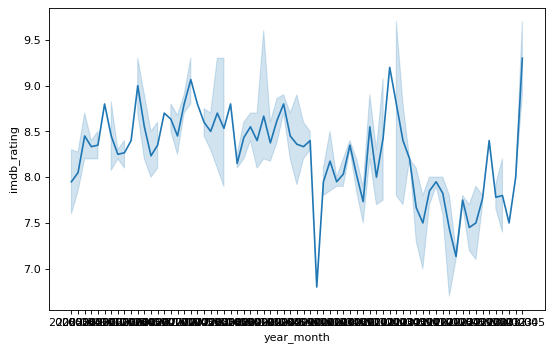

In [ ]:
#sns.lineplot(x="month", y="imdb_rating", data=ceci)
sns.lineplot(x="year_month", y="imdb_rating", data=ceci)
a = ceci.groupby(["month"], as_index=False)['imdb_rating'].mean()
b = ceci.groupby(["year_month"], as_index=False)['imdb_rating'].mean()
e = ceci.groupby(["day_of_week"], as_index=False)['imdb_rating'].mean()
e


In [ ]:
#will get rid of some columns just to train data
#when data is cleaned, dont run the first line

ceci_ = ceci.drop(ceci.columns[[2, 3, 4,7,12,13]], axis=1)
ceci_ = pd.get_dummies(ceci_)
ceci_

,season,episode,imdb_rating,total_votes,n_lines,n_directions,n_words,n_speak_char,month_01,month_02,month_03,month_04,month_05,month_09,month_10,month_11,month_12,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday
0,1,1,7.6,3706,229,27,2757,15,0,0,1,0,0,0,0,0,0,0,1,0
1,1,2,8.3,3566,203,20,2808,12,0,0,1,0,0,0,0,0,0,0,0,1
2,1,3,7.9,2983,244,21,2769,13,0,0,0,1,0,0,0,0,0,0,0,1
3,1,4,8.1,2886,243,24,2939,14,0,0,0,1,0,0,0,0,0,0,0,1
4,1,5,8.4,3179,230,49,2437,18,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,19,8.0,1484,273,59,2965,24,0,0,0,1,0,0,0,0,0,0,1,0
182,9,20,8.0,1482,234,48,2564,27,0,0,0,1,0,0,0,0,0,0,1,0
183,9,21,8.9,2041,382,33,4333,20,0,0,0,0,1,0,0,0,0,0,1,0
184,9,22,9.3,2860,501,54,4965,30,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
import numpy as np

# sklearn modules
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split

In [ ]:
X = ceci_.drop('imdb_rating', axis = 1)
y = ceci_["imdb_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

print("done")


(148, 139)
(38, 139)
(148,)
done


(keeping the seed the same will result in the same partition(s) each time this cell is rerun)

Normal Linear Regression

In [ ]:
lm = LinearRegression().fit(X_train, y_train)
print(lm.coef_) #doesnt return intercept

#get_coefs(lm) from the function, returns intercept


[ 4.66264773e-02  6.97821133e-04  2.60324933e-03 -7.00330040e-04
 -6.16893853e-05 -1.15638825e-02 -4.89503592e-02  4.50195436e-14
  4.32672692e-01 -1.90116803e-01  2.33285041e-01 -3.65284620e-02
 -1.66074550e+00 -8.96545303e-02 -1.56434538e-01  9.30736313e-02
  2.25452298e-01 -8.94270796e-02  5.34509998e-02 -5.15408184e-02
  1.12643491e-01  1.27203615e-01 -5.13402390e-02 -5.45119505e-14
 -9.12603326e-14 -2.46886535e-01  7.61889934e-02  2.62816871e-01
  3.61032450e-01  8.05510770e-01  1.23173644e-01 -2.94319965e-01
 -1.89060416e-01 -2.47551439e+00 -1.01902502e+00 -4.62431959e-01
 -6.52747923e-02 -2.02818347e-01  3.92305210e-01  1.41139704e-01
 -2.52311924e-01 -1.60749072e+00  4.42407903e-02 -1.53337444e-01
 -1.17358665e-01  1.69818899e-02 -7.21644966e-16  2.40226240e-01
 -1.17013777e-01  6.59585030e-01  5.72867219e-01 -1.61697793e-01
  5.45918914e-01  2.79564166e-01  5.48160369e-01  2.58406823e-01
  9.89998434e-01 -4.86207648e-02 -1.66320385e-01  6.93715412e-01
  2.77555756e-17  1.99206

In [ ]:
y_hat_test = lm.predict(X_test)
y_hat_train = lm.predict(X_train)

rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)

print(f"RME for test data: {rmse_test}")
print(f"RME for train data: {rmse_train}")

res = pd.DataFrame(
        data = {'y': y_test, 'y_hat': y_hat_test, 'resid': y_test - y_hat_test}
    )

res.head()
#model_fit(lm, X_test, y_test, plot=True)

RME for test data: 0.6150320388598637
RME for train data: 0.29844019799091975


,y,y_hat,resid
106,8.4,8.236365,0.163635
45,8.9,8.691439,0.208561
158,7.2,7.903144,-0.703144
63,7.9,8.042487,-0.142487
135,9.7,10.984424,-1.284424


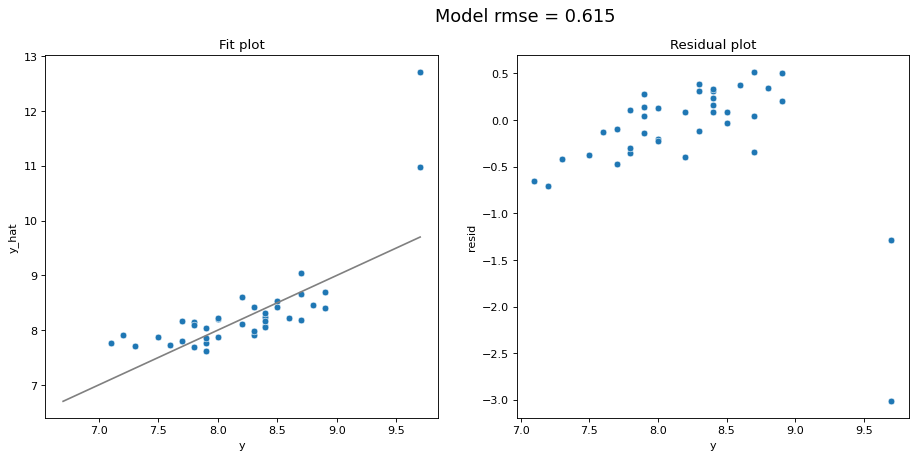

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.lineplot(x='y', y='y_hat', color="grey", data = pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
plt.subplot(122)
sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        
plt.subplots_adjust(left=0.0)
        
plt.suptitle("Model rmse = " + str(round(rmse_test, 4)), fontsize=16)
plt.show()

In [ ]:
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

def model_fit(m, X, y, plot = False):
    """Returns the root mean squared error of a fitted model based on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    rmse = mean_squared_error(y, y_hat, squared=False)
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(12, 6))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y', y='resid', data=res).set_title("Residual plot")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model rmse = " + str(round(rmse, 4)), fontsize=16)
        plt.show()
    
    return rmse

In [ ]:
#data = pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]})
#data

,y,y_hat
0,6.7,6.7
1,9.7,9.7


# GridSearch CV

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

m = make_pipeline(
        PolynomialFeatures(),
        LinearRegression(fit_intercept=False)
    )

parameters = {
    'polynomialfeatures__degree': np.arange(1,6,1)
}

kf = KFold(n_splits=5, shuffle=True, random_state=0)

grid_search = GridSearchCV(m, parameters, cv=kf, scoring="neg_root_mean_squared_error").fit(X_train, y_train)

In [ ]:
print("best index: ", grid_search.best_index_) #position of the array of the degree
print("best param: ", grid_search.best_params_)
print("best score: ", grid_search.best_score_)

best index:  0
best param:  {'polynomialfeatures__degree': 1}
best score:  -0.33836060600614715


In [ ]:
#for each fold and for each degree
grid_search.cv_results_["mean_test_score"]

array([  -0.33836061,   -4.72827474,   -3.9484387 ,  -47.06005169,
       -133.21370099])

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.00418253, 0.02287831, 0.1341856 , 0.35233459, 1.75218582]),
 'std_fit_time': array([0.00052293, 0.01792504, 0.03701133, 0.03809811, 0.11559208]),
 'mean_score_time': array([0.00203476, 0.00340452, 0.02259688, 0.02146301, 0.06775818]),
 'std_score_time': array([0.00054173, 0.00022155, 0.0196039 , 0.02100205, 0.02598415]),
 'param_polynomialfeatures__degree': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'polynomialfeatures__degree': 1},
  {'polynomialfeatures__degree': 2},
  {'polynomialfeatures__degree': 3},
  {'polynomialfeatures__degree': 4},
  {'polynomialfeatures__degree': 5}],
 'split0_test_score': array([ -0.35448732,  -4.2556896 ,  -2.3244074 , -13.28814595,
        -37.29164101]),
 'split1_test_score': array([-0.33747147, -2.18475855, -2.1193546 , -5.40143438, -7.34657219]),
 'split2_test_score': array([ -0.3227626 , -12.73687689,  -1.68933915

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [ ]:
grid_search.best_estimator_.named_steps['linearregression'].coef_

array([ 3.79984979e+00, -9.34226153e-03,  4.61879489e-02,  6.81509170e-04,
        1.70631955e-03,  7.74375248e-04, -5.40311507e-05, -2.11241789e-03,
        3.45862306e-01,  2.68206163e-01,  1.87444335e-03,  1.07033212e-01,
        1.64344244e-01,  9.67386294e-01,  6.69458071e-01,  5.97897942e-01,
        6.77787117e-01,  4.13805795e-01,  1.78388702e+00,  1.60215698e+00])

<AxesSubplot:xlabel='imdb_rating'>

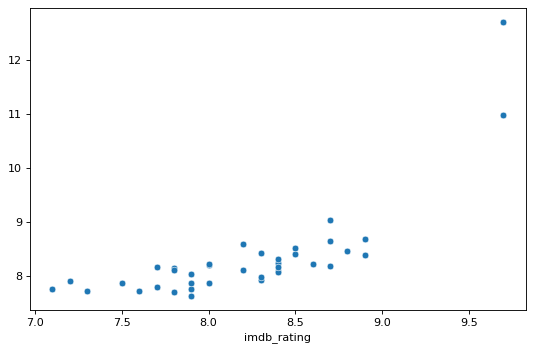

In [ ]:
pred = grid_search.best_estimator_.predict(X_test)
sns.scatterplot(
    x=y_test,
    y=grid_search.best_estimator_.predict(X_test)
)

#sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
 #       sns.scatterplot(x='y', y='y_hat', data=res).set_title("Fit plot")
      

# Ridge-Lasso

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.50707e-17): result may not be accurate.
  overwrite_a=True).T
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60315e-17): result may not be accurate.
  overwrite_a=True).T
best alpha: 5.757575757575758
best rmse : 0.33954354200279613


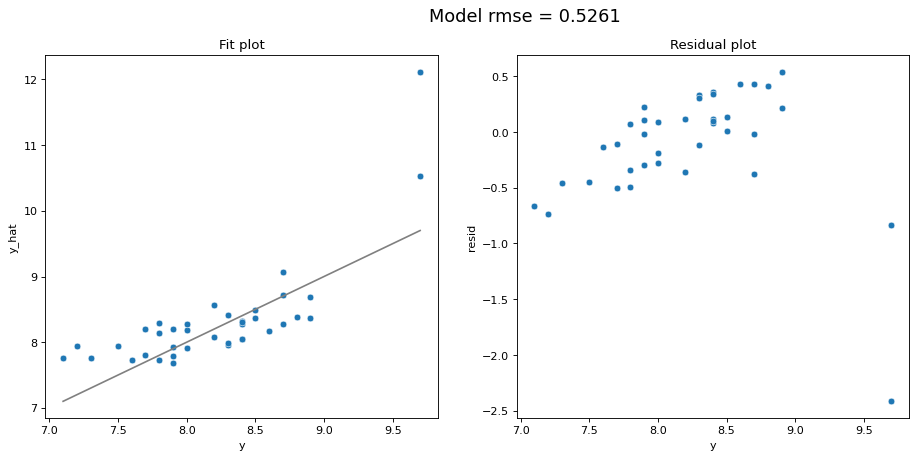

validation rmse: 0.5261324622850142


In [ ]:
#alphas = np.logspace(-1, 10, num=200)
alphas =  np.linspace(0, 10, num=100)
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Ridge()
    ),
    param_grid={'ridge__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="neg_root_mean_squared_error"
).fit(X_train, y_train)

#print(gs.best_params_)
#model_fit(gs.best_estimator_, X_test, y_test, plot=True)
#print(gs.best_estimator_) #best RMSE
print( "best alpha:", gs.best_params_['ridge__alpha'])
print("best parameters", gs.best_params_)
print( "best rmse :", gs.best_score_ * -1)
print( "validation rmse:", model_fit(gs.best_estimator_, X_test, y_test, plot = True) )

In [ ]:
#Standard deviation for predictions

stdev = np.sqrt(sum((gs.predict(X_train) - y_train)**2) / (len(y_train) - 2))
stdev



0.304883589243271

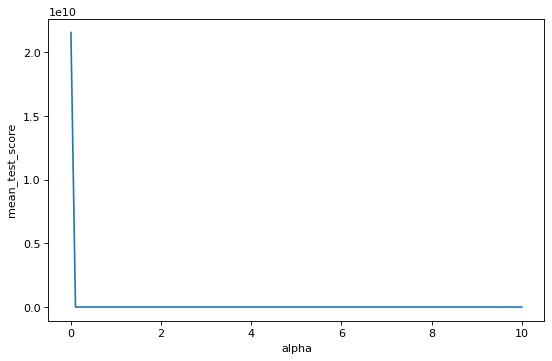

In [ ]:
#gs.cv_results_
cv_res = pd.DataFrame(
    data = gs.cv_results_
).filter(
    # Extract the split#_test_score and mean_test_score columns
    regex = '(split[0-9]+|mean)_test_score'
).assign(
    # Add the alphas as a column
    alpha = alphas
)

cv_res.update(
    # Convert negative rmses to positive
    -1 * cv_res.filter(regex = '_test_score')
)

sns.lineplot(x='alpha', y='mean_test_score', data=cv_res)
plt.show()

If we want to see how the coefficients behave with no cross-validation. Because CV helps us to choose between models

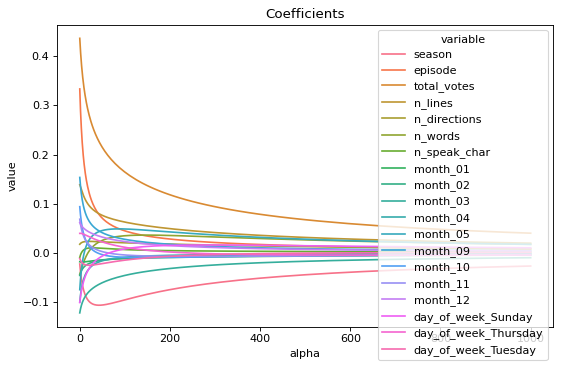

In [ ]:
alphas = np.logspace(-2, 3, num=200) # from 10^-2 to 10^3

betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Ridge(alpha=a)
    ).fit(X_train, y_train)
    
    # We drop the intercept as it is not included in Ridge's l2 penalty and hence not shrunk
    betas.append(get_coefs(m)[1:]) 
    rmses.append(model_fit(m, X_test, y_test))

res = pd.DataFrame(data = betas,
                    columns = X.columns # Label columns w/ feature names
                    ).assign(alpha = alphas,
                            rmse = rmses).melt(id_vars = ('alpha', 'rmse'))

sns.lineplot(x='alpha', y='value', hue='variable', data=res).set_title("Coefficients")
plt.show()

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from numpy.random import uniform
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:

alpha_list = uniform(0.1, 10, 100)
#metrics = ["r2"]#, "neg_mean_absolute_error"]

pipe = Pipeline([
    ("scaler",StandardScaler()),
    ("poly", PolynomialFeatures()),#degree=1
    ("model", Ridge())#, max_iter = 1000
])

params = {
    "model__alpha": alpha_list,
    "poly__include_bias" : [True,False],
    "poly__degree": [1,2,3]
}

kf = KFold(5, shuffle=True, random_state=0)

# step2: initialize the model
gcv_ridge = GridSearchCV(pipe, params,cv = kf, scoring= "neg_mean_absolute_error")
# step 3: train the model
gcv_ridge.fit(X_train, y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': array([6.20058967, 2.74043436, 7.67371922, 8.71011248, 3.35113975,
       3.73041061, 1.49504683, 5.12522497, 6.09935165, 1.99799207,
       9.28948163, 5.03982786, 2.84692426, 9.66165...
       8.71695143, 3.19858453, 3.22245367, 4.9869969 , 8.2014612 ,
       8.491371  , 4.04182311, 6.56260076, 9.65705575, 8.90392319,
       3.35510388, 1.5932515 , 8.22636596, 1.29390267, 4.7231762 ,
       7.97365423, 0.36727762, 7.5480228 , 1.96271638, 7.12110797,
       8.84563854, 9.85500518, 0.66725894, 3.19499975, 8.39512993]),
                         'poly__degree': [1, 2, 3],
                         'poly__include_bias': [True, False]},
             scoring='neg_mean_absolute_error')

In [ ]:
print("best parameters:",gcv_ridge.best_params_)
print("best rmse:",gcv_ridge.best_score_)
gcv.best_estimator_.named_steps["model"].coef_

best parameters: {'model__alpha': 9.981277483075592, 'poly__degree': 1, 'poly__include_bias': True}
best rmse: -0.3610605906497115


array([ 0.,  0.,  0., ...,  0., -0.,  0.])

In [ ]:
len(gcv.best_estimator_.named_steps["model"].coef_)
#X_train

467180

<AxesSubplot:xlabel='imdb_rating'>

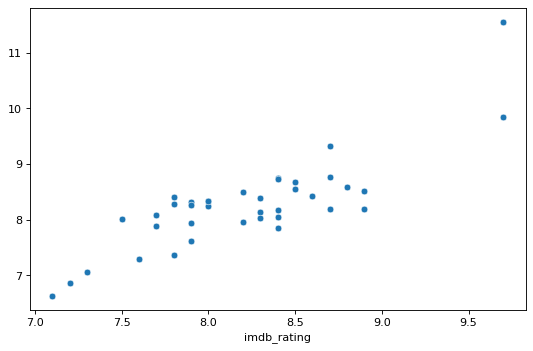

In [ ]:
pred = gcv.best_estimator_.predict(X_test)
sns.scatterplot(
    x=y_test,
    y=gcv.best_estimator_.predict(X_test)
)

In [ ]:
#actors_n = ceci.groupby(["month"], as_index=False)['imdb_rating'].mean()
ceci = pd.read_csv("the_office.csv")

#actors_n = ceci.groupby(['director']).agg({'imdb_rating': ['mean','count']})
#actors_n[(df['count']>1)]
director_n = df.groupby('director') \
       .agg({'director':'size', 'imdb_rating':'mean'}) \
       .rename(columns={'director':'count','imdb_rating':'mean_rating'}) \
       #.reset_index()

director_n

#writers 46, director 61


,count,mean_rating
director,,
Alex Hardcastle,1,7.500000
Amy Heckerling,1,7.800000
Asaad Kelada,1,8.100000
B.J. Novak,5,7.980000
Brent Forrester,4,7.950000
Brian Baumgartner,1,8.100000
Bryan Cranston,1,7.900000
Bryan Gordon,2,8.550000
Charles McDougal,1,8.400000


# Missing:
1)Lasso

2) delete columns that have low correlation with rating and then try again ridge and lasso.

3) matrix correlation

4) code for SE of coefficients

5) plot for true data and estimated data, and errors.

### Lasso - 02/03/21


In [ ]:
alpha_list = uniform(0.1, 10, 100)
#metrics = ["r2"]#, "neg_mean_absolute_error"]

lasso_pipe = Pipeline([
    ("scaler",StandardScaler()),
    ("poly", PolynomialFeatures()),#degree=1
    ("model", Lasso())#, max_iter = 1000
])

params = {
    "model__alpha": alpha_list,
    "poly__include_bias" : [True,False],
    "poly__degree": [1,2,3]
}

kf = KFold(5, shuffle=True, random_state=0)

# step2: initialize the model
lasso_gcv = GridSearchCV(lasso_pipe, params,cv = kf, scoring= "neg_mean_absolute_error")
# step 3: train the model
lasso_gcv.fit(X_train, y_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025172527325241223, tolerance: 0.0032582796610169497
  positive)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025172527325241223, tolerance: 0.0032582796610169497
  positive)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([2.82126272, 7.21622215, 1.02923696, 9.15111349, 2.64808946,
       6.8588124 , 0.3926895 , 2.48338405, 5.36788392, 3.38381225,
       1.19975635, 4.18914337, 9.87064392, 9.7000489...
       8.37981757, 2.46169053, 5.51846678, 9.07341178, 1.70574009,
       1.03533618, 8.97773785, 4.7866701 , 9.22300567, 2.66206234,
       8.54297018, 6.46221303, 6.00691632, 1.36067915, 9.38881976,
       7.72281628, 5.01741195, 4.64666995, 3.43332382, 3.11742765,
       1.07983071, 1.31043799, 0.96914483, 4.1494041 , 6.35539167]),
                         'poly__degree': [1, 2, 3],
                         'poly__include_bias': [True, False]},
             scoring='neg_mean_absolute_error')

In [ ]:
print("best parameters:",gcv.best_params_)
print("best rmse:",gcv.best_score_)
lasso_gcv.best_estimator_.named_steps["model"].coef_

best parameters: {'model__alpha': 6.862796000586165, 'poly__degree': 3, 'poly__include_bias': True}
best rmse: -0.39748459757246657


array([ 0.,  0.,  0., ...,  0., -0.,  0.])

The model alpha of 6.86 is useful to know, however the coeficients are not useful as there are 400,000+ coeficients and the majority of which are zeros, meaning the majority of features are recomenddedd to be removed - this is however, not practical. 

In [ ]:
lasso_coefs = gcv.best_estimator_.named_steps["model"].coef_
pd.DataFrame(lasso_coefs)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
467175,-0.0
467176,-0.0
467177,0.0
467178,-0.0


In [ ]:

lasso_pipe = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(),
        Lasso()
        )

lasso_params = {'lasso__alpha': alpha_list,
             'polynomialfeatures__degree': [3]}

# step2: initialize the model
lasso_cv = GridSearchCV(lasso_pipe,lasso_params,cv = kf ,scoring="neg_root_mean_squared_error")

# step 3: train the model
lasso_cv.fit(X_train, y_train)
print( "validation rmse:", model_fit(try_c.best_estimator_, X_test, y_test, plot = True ))

print( "best alpha:", l_gs.best_params_['lasso__alpha'])
print( "best rmse :", l_gs.best_score_ * -1)

KeyboardInterrupt: 

##### STANDARD ERRORS
The below shows the errors expected to be within the model. 

In [ ]:
# prerequisit: we need to have resid = y_test -  y_hat for this function to work. 


def get_SandT_Error(y,y_hat):
    '''
    y = Input target variable
    y_hat = Output test 
    Returns a test_error, standard_error rounded to 3 dp. 
    '''
    test_error = np.mean(abs(y-y_hat))
    standard_error = np.sqrt(np.var(abs(y-y_hat),ddof=1)/len(abs(y-y_hat)))
    return round(test_error,3), round(standard_error,3)


#get_SandT_Error(c,d)
get_SandT_Error(y_train,y_hat)


NameError: name 'y_hat' is not defined

In [ ]:
alpha_list = uniform(0.1, 10, 100)
betas = [] # Store coefficients
rmses = [] # Store validation rmses

for a in alpha_list:
    m = make_pipeline(
        StandardScaler(),
        Lasso(alpha=alpha_list)
    ).fit(X_train, y_train)

    # Again ignore the intercept since it isn't included in the penalty
    betas.append(m.coef_[1:])  
    rmses.append(mean_squared_error(y_train, m.predict(X_train)))

res = pd.DataFrame(
    data = betas,       # Coefficients
    columns = X_train.columns # Coefficient names
).assign(
    alpha = alpha_list,     # Add alphas
    rmse = rmses        # Add validation rmses
).melt(
    id_vars = ('alpha', 'rmse') # Move columns into the rows
)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
sns.lineplot(x='alpha', y='value', hue='variable', data=res).set_title("Coefficients")
plt.show()

In [ ]:
print( "best alpha:", try_c.best_params_['ridge__alpha'])
print( "best rmse :", try_c.best_score_ * -1)
try_c.best_params_




best alpha: 9.192727272727272
best rmse : 0.3408347012910804


{'polynomialfeatures__degree': 1, 'ridge__alpha': 9.192727272727272}

best alpha: 0.01
best rmse : 0.3428241830196212


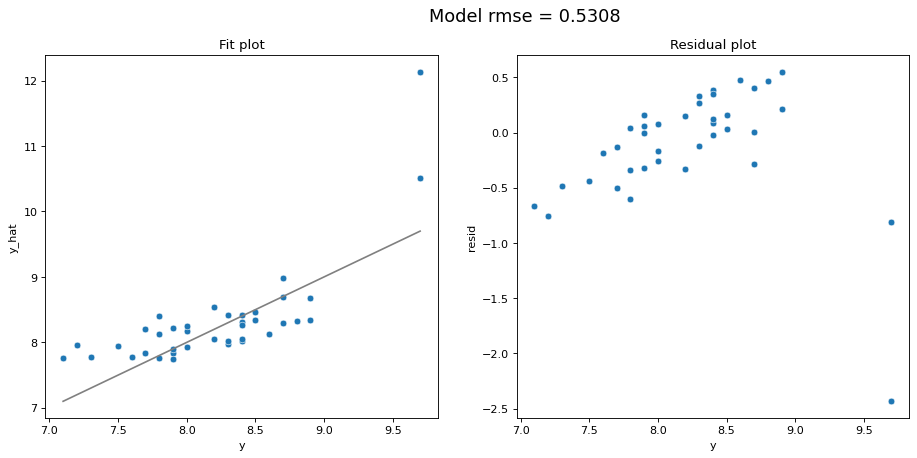

validation rmse: 0.5307522831475657


In [ ]:
alphas = np.linspace(0.01, 1, num=100)

l_gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        Lasso()
    ),
    param_grid={'lasso__alpha': alphas},
    cv=KFold(5, shuffle=True, random_state=1234),
    scoring="neg_root_mean_squared_error"
).fit(X_train, y_train)

print( "best alpha:", l_gs.best_params_['lasso__alpha'])
print( "best rmse :", l_gs.best_score_ * -1)
print( "validation rmse:", model_fit(l_gs.best_estimator_, X_test, y_test, plot = True ))

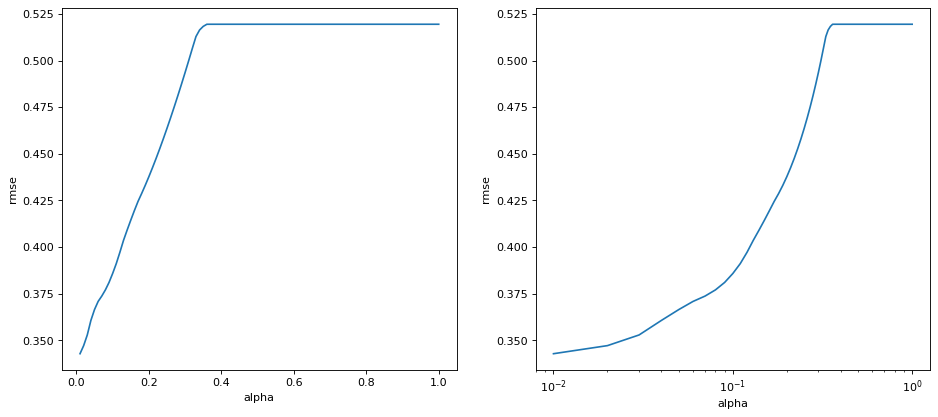

In [ ]:
l_cv_res = pd.DataFrame().assign(
    alpha = alphas,
    rmse = -1 * l_gs.cv_results_['mean_test_score'],           # mean of the rmse over the folds
    rmse_se = l_gs.cv_results_['std_test_score'] / np.sqrt(l_gs.n_splits_), # standard error of the rmse
)

plt.figure(figsize=(14, 6))
        
plt.subplot(121)
sns.lineplot(x='alpha', y='rmse', data=l_cv_res)

plt.subplot(122)
sns.lineplot(x='alpha', y='rmse', data=l_cv_res).set_xscale('log')

alpha: 7.1
rmse: 0.5133688854604146


Markdown cell $\LaTeX$

### FY - RBF Kernel machine

In [ ]:
y_train

139    8.2
8      8.4
113    7.9
170    7.8
92     8.2
      ... 
103    6.8
67     8.1
117    8.2
47     8.7
172    7.7
Name: imdb_rating, Length: 148, dtype: float64

In [ ]:
from sklearn.svm import SVR

C_values = np.linspace(1, 100, num=50)
gamma_values =  np.linspace(0.001, 1, num=50)

param_grid = dict(gamma=gamma_values, C=C_values)

cv=KFold(5, shuffle=True, random_state=1234)

grid = GridSearchCV(SVR(kernel = 'rbf'),
                    param_grid=param_grid,
                    cv=cv )

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# FURTHER WORK NEEDED ON THIS: i'm just getting the best Gamma as the lowest in the range (i.e. closes to 0)


NameError: name 'KFold' is not defined

In [ ]:
#Using best fit Gamma
from sklearn.svm import SVR


RBF_model = SVR(kernel = 'rbf',  C=3.02, gamma=0.8, epsilon=0.1)

clx = RBF_model.fit(X_train, y_train)

y_RBF = clx.predict(X_train)

plt.scatter(X_train['episode'], y_train, color = 'orange', label = 'Training Data')
plt.scatter(X_train['episode'], y_RBF, color = 'cyan', label = 'RBF Model')
plt.xlabel('Episode')
plt.ylabel('IMBD Rating')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

NameError: name 'X_train' is not defined

In [ ]:
X_train.shape, y_train.shape, y_RBF.shape

((148, 19), (148,), (148,))

In [ ]:
RBF_model.score(X_train, y_train)

0.9684476103374204

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of a NBC Universal executive who is with the show and  university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Finally, you should include concrete recommendations on what NBC Universal should do to make their reunion episode a popular as possible.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*

## 5. Convert Document

In [ ]:
# Run the following to render to PDF
!jupyter nbconvert --to markdown project1.ipynb

[NbConvertApp] Converting notebook project1.ipynb to markdown
[NbConvertApp] Writing 12589 bytes to project1.md


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d54bbee-a4bc-40dc-a5f1-a0190c0e14b4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>